In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [2]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [3]:
# TwoLayerNet 인스턴스 선언
# parameters : input_size=784, hidden_size=50, output_size=10
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [4]:
# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)
print(train_size,batch_size, iter_per_epoch)

60000 100 600.0


In [5]:
for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    # network 인스턴스의 기울기 계산 메서드(gradient) 호출 결과를 grad에 리턴
    # parameters : x_batch, t_batch    
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        # network 인스턴스의 매개변수를 갱신
        # 매개변수 params의 key에 -= learning_rate * grad[key]으로 갱신
        network.params[key] -=  learning_rate * grad[key]
    
    # 학습 경과 기록
    # network 인스턴스의 손실함수 메서드(loss) 호출 결과를 loss에 리턴
    # parameters : x_batch, t_batch
    loss = network.loss(x_batch, t_batch)
    
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        # network 인스턴스의 정확도 계산 메서드(accuracy) 호출 결과를 train_acc에 리턴
        # parameters : x_batch, t_batch
        train_acc = network.accuracy(x_batch, t_batch)
        
        # network 인스턴스의 정확도 계산 메서드(accuracy) 호출 결과를 test_acc에 리턴
        # parameters : x_test, t_test
        test_acc = network.accuracy(x_test, t_test)
        
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))



train acc, test acc | 0.11, 0.1049
train acc, test acc | 0.81, 0.7966
train acc, test acc | 0.85, 0.8825
train acc, test acc | 0.9, 0.8998
train acc, test acc | 0.87, 0.9097
train acc, test acc | 0.89, 0.9163
train acc, test acc | 0.88, 0.9205
train acc, test acc | 0.96, 0.9254
train acc, test acc | 0.97, 0.9307
train acc, test acc | 0.93, 0.9334
train acc, test acc | 0.86, 0.9358
train acc, test acc | 0.93, 0.9386
train acc, test acc | 0.97, 0.9418
train acc, test acc | 0.83, 0.9423
train acc, test acc | 0.94, 0.9448
train acc, test acc | 0.92, 0.9461
train acc, test acc | 0.93, 0.947


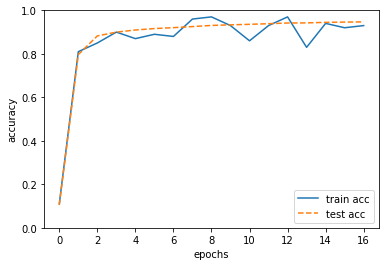

In [6]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()